<h1>ML Data Cleaning and Feature Selection</h1>

About Dataset
Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration

What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

ML Data Cleaning and Feature Selection

* [What are the data types? (Only numeric and categorical) -- done](https://github.com/midhunmohank/DS/blob/master/Notebooks/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb)

* Are there missing values? -- done

* What are the likely distributions of the numeric variables? -- done

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods) -- in progress

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.



## TOC:
- [What are the data types? (Only numeric and categorical)](#What-are-the-data-types?-(Only-numeric-and-categorical))
* [Second Bullet Header](#second-bullet)

In [3]:
url = "https://raw.githubusercontent.com/midhunmohank/DS/master/Datasets/AB_NYC_2019.csv"
df = pd.read_csv(url)

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#Rearraging the response varaible i.e Price column to the end of the dataframe
column_to_move = df.pop("price")

# insert column with insert(location, column_name, column_value)

df.insert(15, "price", column_to_move)

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,NaN,1,365,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,2018-11-19,0.10,1,0,80


<h3>Dropping the following customer data sensitive features:</h3>
<l>
<li>id</li>
<li>name</li>
<li>host_id</li>
<li>host_name</li>
<li>last_review</li>
</l>

In [7]:
df.drop(["id","name","host_id","host_name","last_review","latitude","longitude"],axis=1,inplace= True)

In [8]:
#Checking changes
df.head(5)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,Kensington,Private room,1,9,0.21,6,365,149
1,Manhattan,Midtown,Entire home/apt,1,45,0.38,2,355,225
2,Manhattan,Harlem,Private room,3,0,NaN,1,365,150
3,Brooklyn,Clinton Hill,Entire home/apt,1,270,4.64,1,194,89
4,Manhattan,East Harlem,Entire home/apt,10,9,0.10,1,0,80


In [9]:
df.shape

(48895, 9)

### What are the data types? (Only numeric and categorical)

In [10]:
df.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

The dataset has <b>4</b> Categorical and <b>8</b> Numerical Features.

### Are there missing values?

In [11]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

"number_of_reviews" feature has 10052 missing values. For this feature, missing data will be replaced with mean. Since the data is more symmetric, mean replacement would be better.

In [12]:
mean = df["reviews_per_month"].mean()
df["reviews_per_month"].fillna(mean, inplace=True)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

### What are the likely distributions of the numeric variables? 

/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

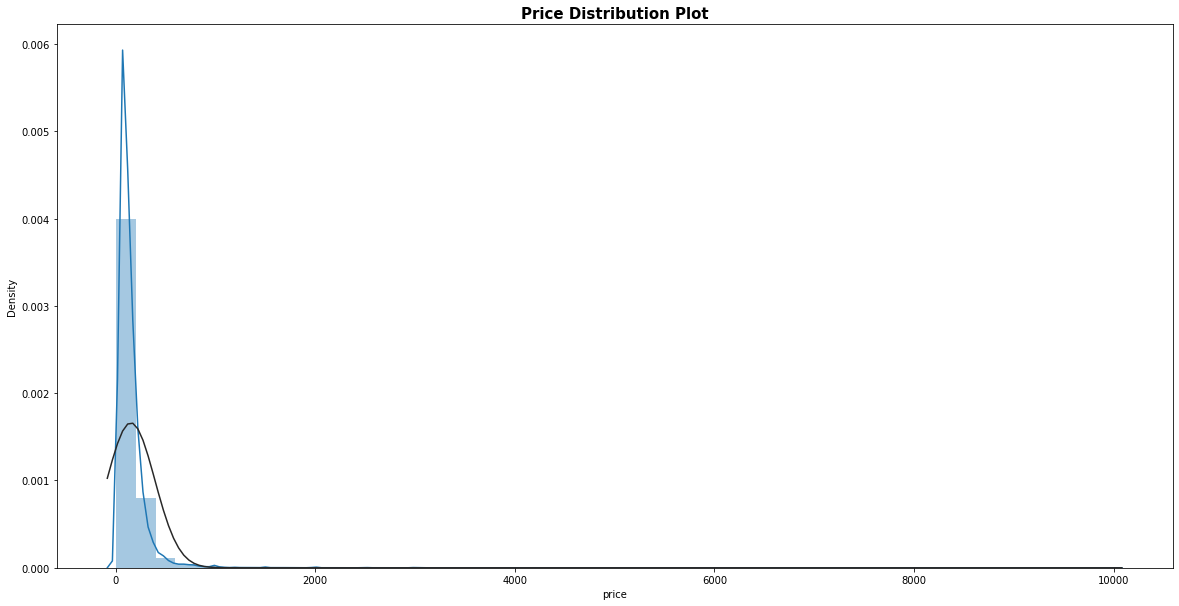

In [13]:
#Distribution of Price

plt.figure(figsize=(20,10))
sns.distplot(df['price'], fit = norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [14]:
dfColumnList = df.columns 
# dfColumnList = [dfColumnList.drop(i) for i in dfColumnList if np.dtype== ]


In [15]:
# for i in dfColumnList:
#   # plt.figure(figsize= (10,10))
#   # sns.distplot(df[i], fit = norm)
#   # plt.title(f"Distribution of {i}",size = 15, weight = "bold")
#   plt.figure(figsize= (20,200))
#   sns.displot(x = df[i], kind = "kde")
#   plt.title(f"Distribution of {i}",size = 15, weight = "bold")

In [16]:
df['price_log'] = np.log(df.price+1)

In [17]:
df
#  plt.figure(figsize=(12,10))
# sns.distplot(df['price_log'], fit=norm)
# plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [ ]:
price_col

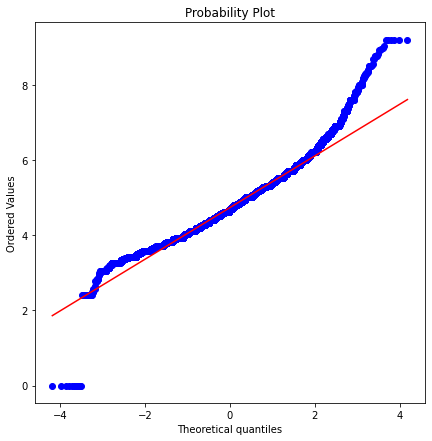

In [18]:
plt.figure(figsize=(7,7))
stats.probplot(df['price_log'], plot=plt)
plt.show()

Before examining price feature, categorical variables will be mapped with help of cat.code. This will assist to make easier and comprehensible data analysis.

In [19]:
df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   room_type                       48895 non-null  int8   
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
 8   price                           48895 non-null  int64  
 9   price_log                       48895 non-null  float64
dtypes: float64(2), int16(1), int64(5), int8(2)
memory usage: 2.8 MB


### Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

<b>For a regression model, the most useful Independent Variables can be statistically determined using the following methods:
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

Each of the following method is applied below to the dataset.</b>

#### 1. Univariate Selction

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:8]
y = df.iloc[:,-1]
y=y.astype('int')
# y = pd.DataFrame(y)
# y.head(10)
# X.describe()


In [21]:
#Applying SelectKBest class to extract top features
bestFeatures = SelectKBest(score_func= chi2, k = 8)
fit = bestFeatures.fit(X,y)


In [22]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [23]:
#Conact two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,neighbourhood_group,92.192926
1,neighbourhood,40931.654560
2,room_type,10059.982210
3,minimum_nights,8080.854858
4,number_of_reviews,29459.835799
5,reviews_per_month,144.557040
6,calculated_host_listings_count,178845.144014
7,availability_365,101613.481185


In [24]:
#Ordering methods from highest importance to lowest
print(featureScores.nlargest(10,'Score'))

                            Specs          Score
6  calculated_host_listings_count  178845.144014
7                availability_365  101613.481185
1                   neighbourhood   40931.654560
4               number_of_reviews   29459.835799
2                       room_type   10059.982210
3                  minimum_nights    8080.854858
5               reviews_per_month     144.557040
0             neighbourhood_group      92.192926


#### 2.Feature Importance

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [26]:
print(model.feature_importances_)

[0.05148917 0.13873754 0.1617026  0.13031382 0.13363456 0.16833763
 0.0765791  0.13920559]


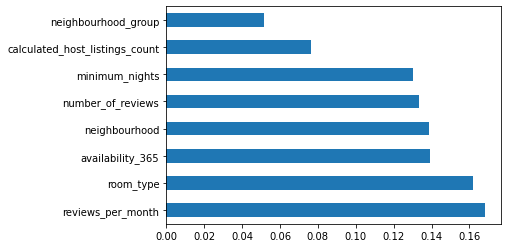

In [27]:
#Plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

#### 3. Correlation Matrix with HeatMap

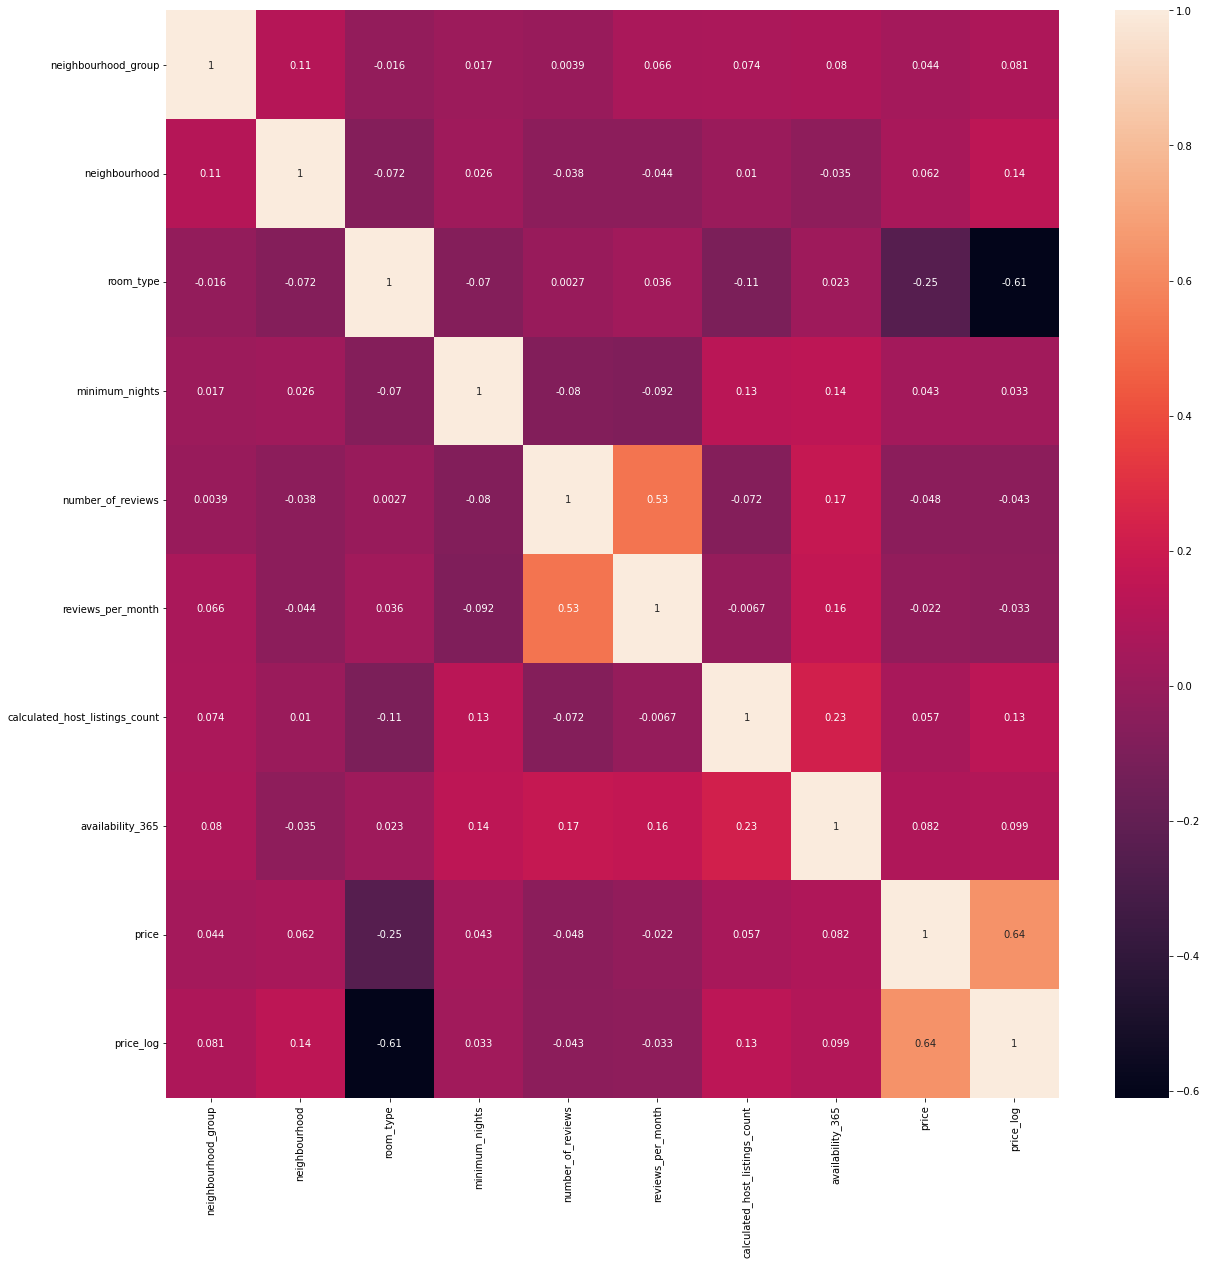

In [28]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heatmap
g = sns.heatmap(df[top_corr_features].corr(), annot= True)

<h3>Outlier Treatment</h3>

<h4> Residual Plots </h4>
Residual Plot is strong method to detect outliers, non-linear data and detecting data for regression models. The below charts show the residual plots for each feature with the price.

An ideal Residual Plot, the red line would be horizontal. Based on the below charts, most features are non-linear. On the other hand, there are not many outliers in each feature. This result led to underfitting. Underfitting can occur when input features do not have a strong relationship to target variables or over-regularized. For avoiding underfitting new data features can be added or regularization weight could be reduced.

In this kernel, since the input feature data could not be increased, Regularized Linear Models will be used for regularization and polynomial transformation will be made to avoid underfitting.

In [43]:
df_x, df_y = df.iloc[:,:8], df.iloc[:,-1]
df_x.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,1,1,9,0.210000,6,365
1,2,127,0,1,45,0.380000,2,355
2,2,94,1,3,0,1.373221,1,365
3,1,41,0,1,270,4.640000,1,194
4,2,61,0,10,9,0.100000,1,0


/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

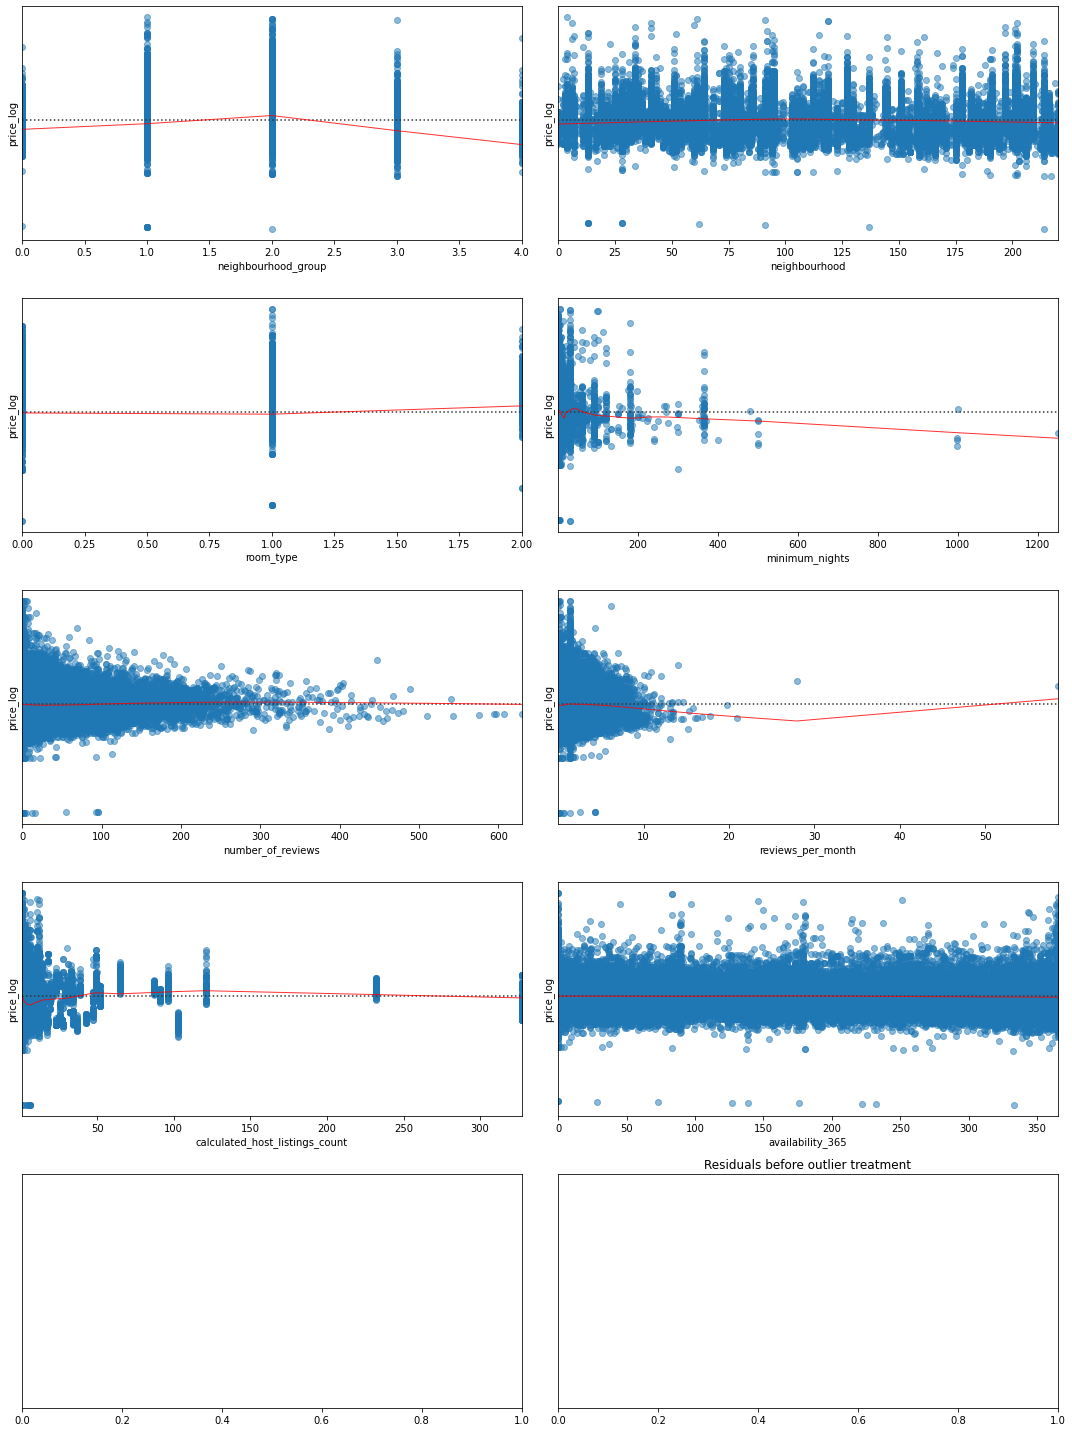

In [30]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(df_x.iloc[:,0],df_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,1],df_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,2],df_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,3],df_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,4],df_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,5],df_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,6],df_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,7],df_y, lowess=True, ax=axes[3, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# sns.residplot(df_x.iloc[:,8],df_y, lowess=True, ax=axes[4, 0], 
#                           scatter_kws={'alpha': 0.5}, 
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# sns.residplot(df_x.iloc[:,9],df_y, lowess=True, ax=axes[4, 1], 
#                           scatter_kws={'alpha': 0.5}, 
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.title("Residuals before outlier treatment")
plt.tight_layout()


In [31]:
df.describe()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_log
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.675345,107.122732,0.504060,7.029962,23.274466,1.373221,7.143982,112.781327,152.720687,4.736885
std,0.735816,68.743096,0.545379,20.510550,44.550582,1.497775,32.952519,131.622289,240.154170,0.695344
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,51.000000,0.000000,1.000000,1.000000,0.280000,1.000000,0.000000,69.000000,4.248495
50%,2.000000,94.000000,0.000000,3.000000,5.000000,1.220000,1.000000,45.000000,106.000000,4.672829
75%,2.000000,178.000000,1.000000,5.000000,24.000000,1.580000,2.000000,227.000000,175.000000,5.170484
max,4.000000,220.000000,2.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,10000.000000,9.210440


/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

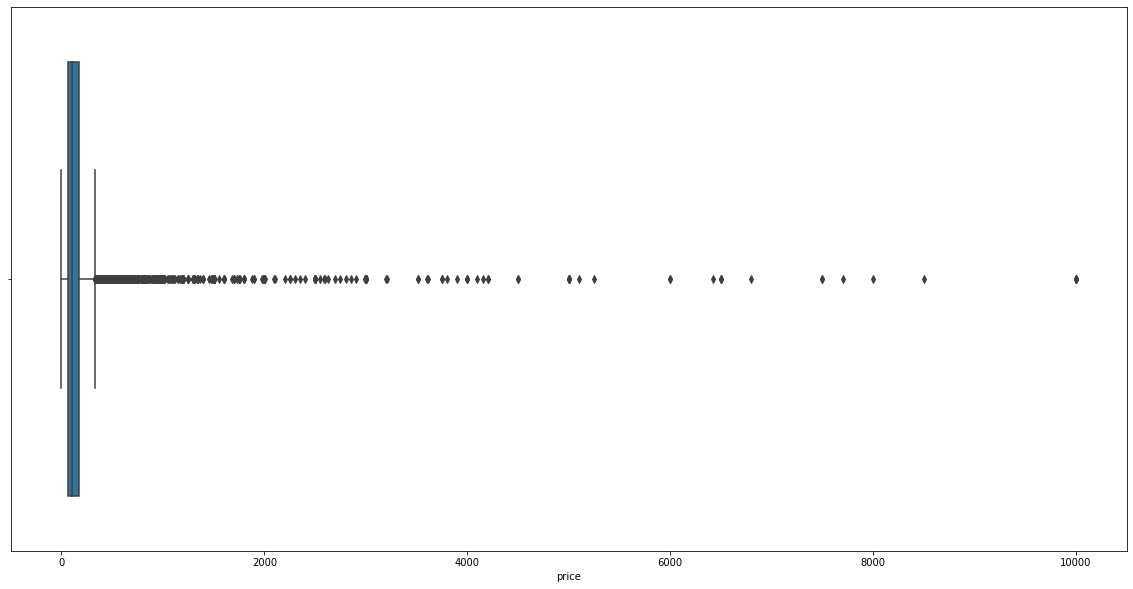

In [32]:
df.price.describe()
plt.figure(figsize = (20,10))
sns.boxplot(df['price'])

The outliers in price is removed and the residuals are checked again.

In [33]:
#calculating minimum and maximum threshold
min_threshold, max_threshold = df.price.quantile([0.01,0.997])
min_threshold, max_threshold

(30.0, 1500.0)

In [34]:
# checking
df[df.price<min_threshold]

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_log
957,4,87,1,3,80,0.920000,1,226,20,3.044522
2675,1,74,2,2,5,0.070000,1,321,29,3.401197
2860,2,64,0,30,0,1.373221,4,137,10,2.397895
3020,3,217,1,2,386,5.530000,3,50,29,3.401197
3918,1,13,2,5,76,1.220000,3,258,25,3.258097
...,...,...,...,...,...,...,...,...,...,...
48486,3,79,0,9,1,1.000000,1,322,16,2.833213
48647,3,164,1,2,0,1.373221,1,24,28,3.367296
48832,1,74,2,1,0,1.373221,3,363,20,3.044522
48867,1,89,2,1,0,1.373221,6,338,25,3.258097


In [35]:
# filtering the outliers and saving the data to a new dataframe data2
df_cleaned = df[(df.price>min_threshold)&(df.price<max_threshold)]
df_cleaned.shape

(48071, 10)

In [36]:
df_cleaned_x, df_cleaned_y = df_cleaned.iloc[:,:8], df_cleaned.iloc[:,-1]
df_x.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,1,1,9,0.210000,6,365
1,2,127,0,1,45,0.380000,2,355
2,2,94,1,3,0,1.373221,1,365
3,1,41,0,1,270,4.640000,1,194
4,2,61,0,10,9,0.100000,1,0


/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

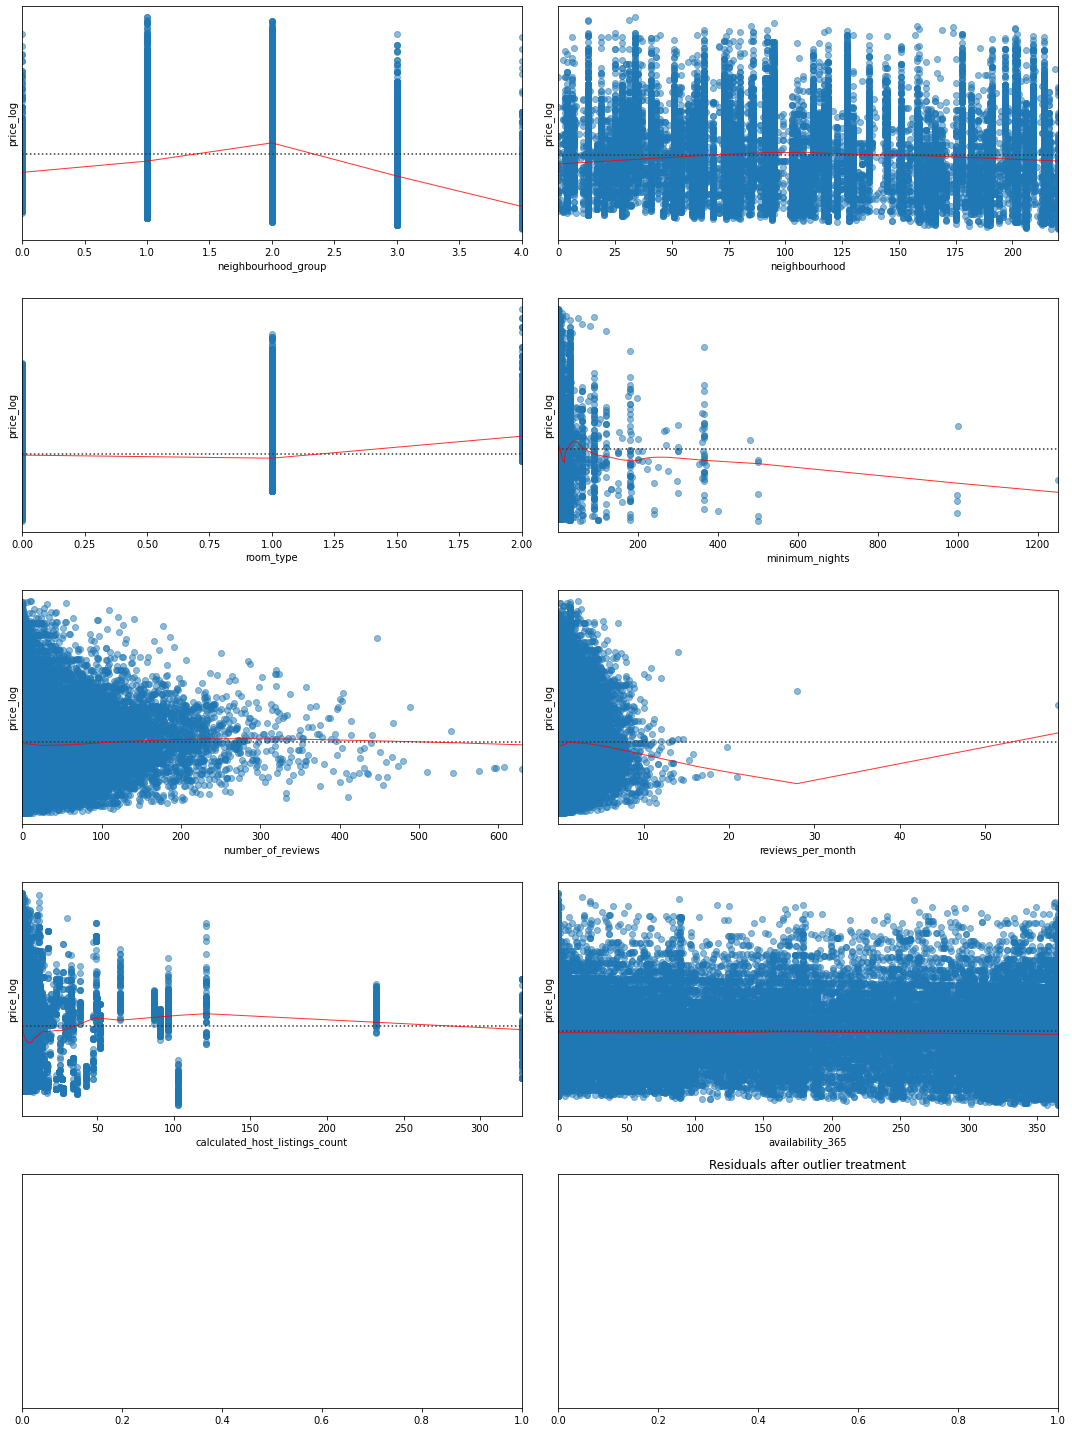

In [37]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(df_cleaned_x.iloc[:,0],df_cleaned_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,1],df_cleaned_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,2],df_cleaned_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,3],df_cleaned_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,4],df_cleaned_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,5],df_cleaned_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,6],df_cleaned_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,7],df_cleaned_y, lowess=True, ax=axes[3, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# sns.residplot(df_cleaned_x.iloc[:,8],df_cleaned_y, lowess=True, ax=axes[4, 0], 
#                           scatter_kws={'alpha': 0.5}, 
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# sns.residplot(df_cleaned_x.iloc[:,9],df_cleaned_y, lowess=True, ax=axes[4, 1], 
#                           scatter_kws={'alpha': 0.5}, 
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.title("Residuals after outlier treatment")
plt.tight_layout()

<h3>Model Buidling </h3>

In [38]:
df.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_log
0,1,108,1,1,9,0.210000,6,365,149,5.010635
1,2,127,0,1,45,0.380000,2,355,225,5.420535
2,2,94,1,3,0,1.373221,1,365,150,5.017280
3,1,41,0,1,270,4.640000,1,194,89,4.499810
4,2,61,0,10,9,0.100000,1,0,80,4.394449


In [39]:
df_cleaned.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_log
0,1,108,1,1,9,0.210000,6,365,149,5.010635
1,2,127,0,1,45,0.380000,2,355,225,5.420535
2,2,94,1,3,0,1.373221,1,365,150,5.017280
3,1,41,0,1,270,4.640000,1,194,89,4.499810
4,2,61,0,10,9,0.100000,1,0,80,4.394449


In [40]:
df.describe()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_log
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.675345,107.122732,0.504060,7.029962,23.274466,1.373221,7.143982,112.781327,152.720687,4.736885
std,0.735816,68.743096,0.545379,20.510550,44.550582,1.497775,32.952519,131.622289,240.154170,0.695344
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,51.000000,0.000000,1.000000,1.000000,0.280000,1.000000,0.000000,69.000000,4.248495
50%,2.000000,94.000000,0.000000,3.000000,5.000000,1.220000,1.000000,45.000000,106.000000,4.672829
75%,2.000000,178.000000,1.000000,5.000000,24.000000,1.580000,2.000000,227.000000,175.000000,5.170484
max,4.000000,220.000000,2.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,10000.000000,9.210440


In [41]:
df_cleaned.describe()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_log
count,48071.000000,48071.000000,48071.000000,48071.000000,48071.000000,48071.000000,48071.000000,48071.000000,48071.000000,48071.000000
mean,1.676312,107.312704,0.493582,6.979114,23.435169,1.374329,7.200599,112.604689,144.505253,4.746635
std,0.731237,68.741199,0.536416,20.372560,44.740326,1.500215,33.213396,131.444969,124.042841,0.650676
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,31.000000,3.465736
25%,1.000000,51.000000,0.000000,1.000000,1.000000,0.270000,1.000000,0.000000,70.000000,4.262680
50%,2.000000,94.000000,0.000000,3.000000,5.000000,1.210000,1.000000,45.000000,109.000000,4.700480
75%,2.000000,178.000000,1.000000,5.000000,24.000000,1.590000,2.000000,226.000000,175.000000,5.170484
max,4.000000,220.000000,2.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1497.000000,7.311886


<h3> Model building </h3>

<h4>Phase 1 - With All Features</h4>
Correlation matrix, Residual Plots and Multicollinearity results show that underfitting occurs on the model and there is no multicollinearity on the independent variables. Avoiding underfitting will be made with Polynomial Transformation since no new features can not be added or replaced with the existing ones.

In model building section, Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression models will be built. These models will be used to avoiding plain Linear Regression and show the results with a little of regularization.

In [ ]:
#Linear Regression 
def linear_reg(input_x, input_y, cv = 5):
    model_LR = LinearRegression()

    parameters = {'fir_intercept':[True, False], 'normalize':[True,False], 'copy_X':[True,False]}

    #Buidling Grid Search algorithm with cross-validation and Mearn Squared Error score

    grid_search_LR = GridSearchCV(estimator = model_LR,
                        param_grid = parameters,
                        scoring = 'neg_mean_squared_error',
                        cv = cv,
                        n_jobs = -1)

    #Finding the best parameters

    grid_search_LR.fir(input_x,input_y)
    best_parameters_LR = grid_search_LR.best_params_
    best_score_LR = grid_search_LR.best_score_
    print(best_parameters_LR)
    print(best_score_LR)

In [ ]:
#Ridge Regression

def ridge_reg(input_x, input_y, cv = 5):
    #Defining Paramters
    model_Ridge = Ridge()

    #Prepare a range of alpha values to test 
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes = ([True,False])

    #Build Grid Search algorithm with cross-validation and Mean Sqaured Erros Score

    grid_search_Ridge = GridSearchCV(estimator = model_Ridge,
                                        param_grid = (dict(alpha = alphas, normalize = normalizes)),
                                        scoring = 'neg_mean_squared_error',cv = cv, n_jobs = -1)


#Finding the best parameters

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_
    best_score_Ridge = grid_search_Ridge.best_score_
    print(best_parameters_Ridge)
    print(best_score_Ridge)




In [ ]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

In [ ]:
def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)

References:
1. https://blog.minitab.com/en/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models
